In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from pandas.plotting import scatter_matrix

In [54]:
#Setting up and checking dataframe
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names = ["SeptalLength", "SeptalWidth", "PetalLength", "PetalWidth", "Class"])
data.head()

,SeptalLength,SeptalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


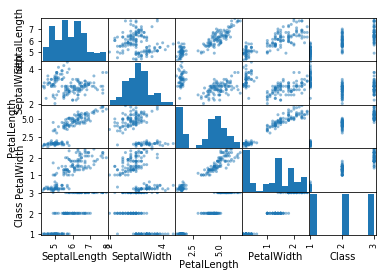

In [60]:
#Choosing Predictors and target
predictors = data[["SeptalLength", "SeptalWidth", "PetalLength", "PetalWidth"]]
target = data.Class

#Coping data and replacing target categories with numeric values in order to  plot data
copied_data = data.copy()
copied_data = copied_data.replace(to_replace = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"], value = [1,2,3])
copied_data.head()
copied_data.astype("float64")
scatter_matrix(copied_data)
plt.show()

In [56]:
#Checking correlation between data -> Biggest correlation betwen petal features and class. Smallest correlation between 
#SeptalWidth and class (also only feature with negative correlation with the target class)
copied_data.corr()

,SeptalLength,SeptalWidth,PetalLength,PetalWidth,Class
SeptalLength,1.000000,-0.109369,0.871754,0.817954,0.782561
SeptalWidth,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLength,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidth,0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


In [70]:
#Preprocess data  by standardizing it (mean of 0 and std of 1)
from sklearn.preprocessing import StandardScaler
X = predictors.values
X[:5,:]
scaler = StandardScaler().fit(X)
rescaled_X = scaler.transform(X)

np.set_printoptions(precision=3)
print(rescaled_X[0:5,:])

[[-0.901  1.032 -1.341 -1.313]
 [-1.143 -0.125 -1.341 -1.313]
 [-1.385  0.338 -1.398 -1.313]
 [-1.507  0.106 -1.284 -1.313]
 [-1.022  1.263 -1.341 -1.313]]


In [ ]:
#Evaluating resampling methods. Kfold, leave_one_out,.. Checking differnet  ones with different parameters. kfold splits data
#at random positions. Leave_one_out uses every second value